In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [4]:
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


C:\Users\poorv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\poorv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\poorv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\poorv\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

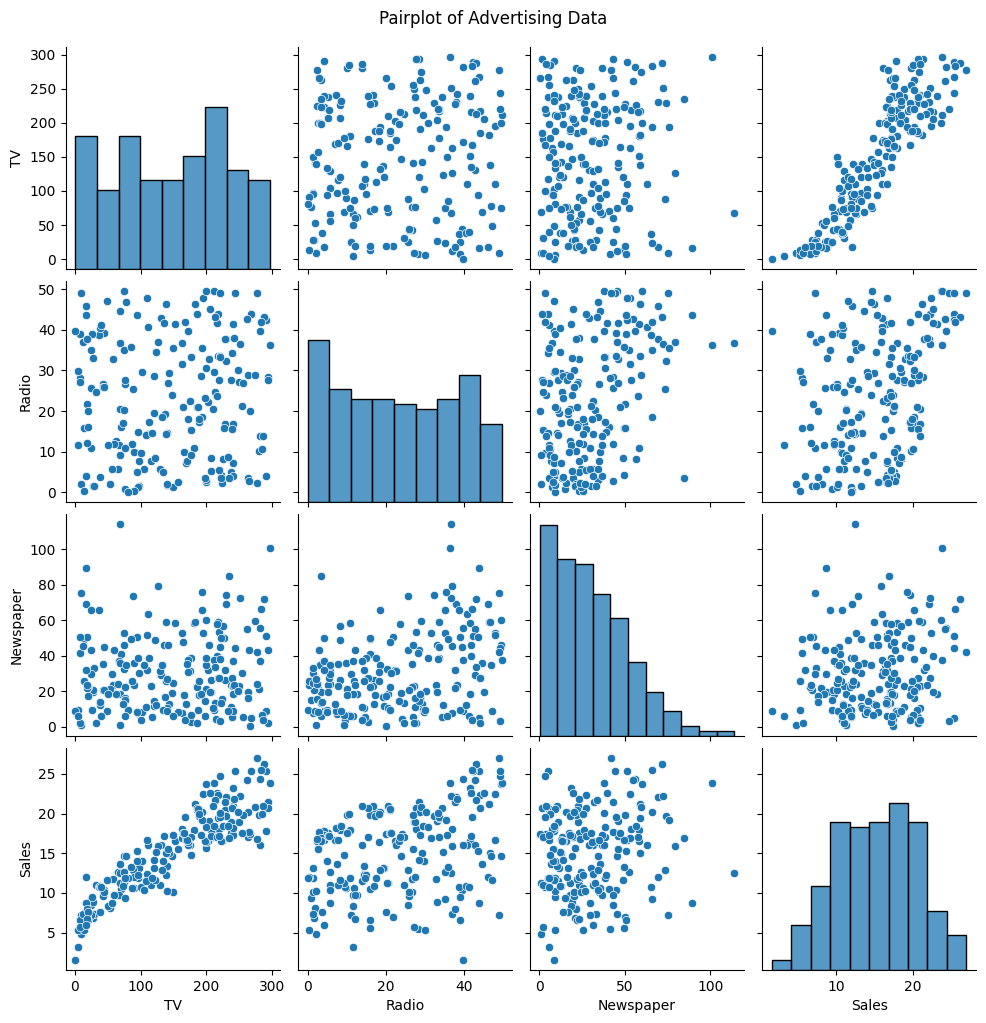

In [5]:
# Visualize relationships using pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()

<Axes: xlabel='TV', ylabel='Frequency'>

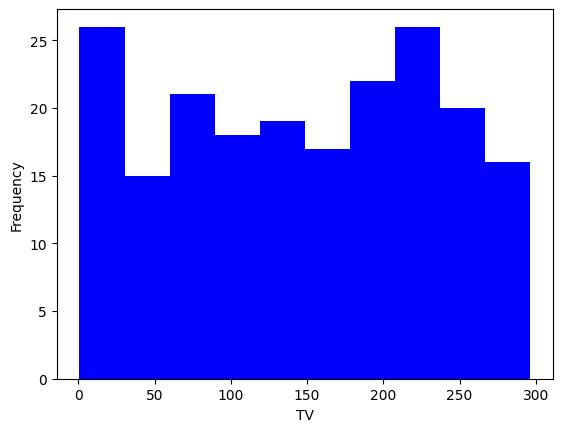

In [6]:
df['TV'].plot.hist(bins=10, color="blue", xlabel="TV")

<Axes: xlabel='Radio', ylabel='Frequency'>

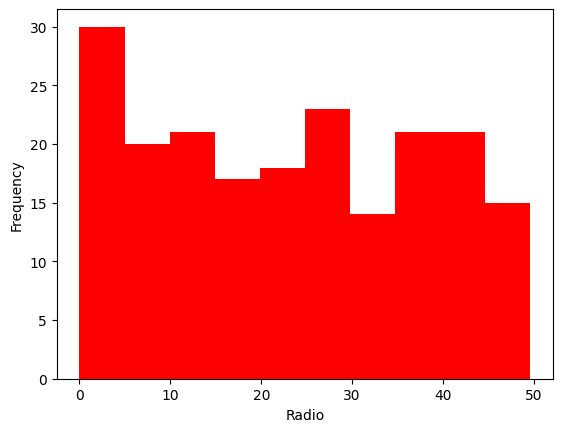

In [7]:
df['Radio'].plot.hist(bins=10, color="red", xlabel="Radio")

<Axes: xlabel='newspaper', ylabel='Frequency'>

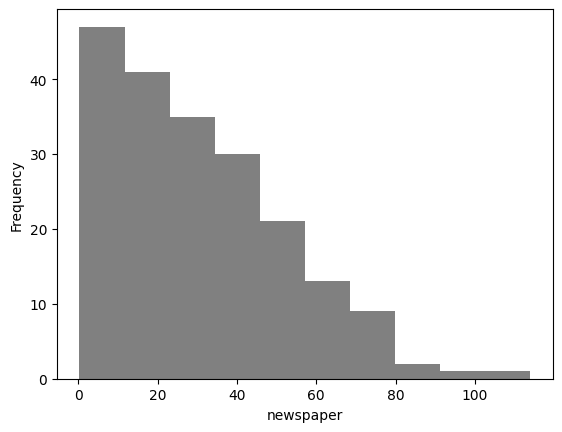

In [8]:
df['Newspaper'].plot.hist(bins=10,color="grey", xlabel="newspaper")

In [9]:
from sklearn.model_selection import train_test_split

# Defining the features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Initialize dictionary to store predictions
predictions = {}

# Fit models and making predictions
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print('Model:', model_name)
    print('Mean Squared Error = {:0.2f}'.format(mse))
    print('R^2 Score = {:0.2f}\n'.format(r2))
    
    return mse, r2

In [12]:
# Evaluate each model
results = {}
for name, y_pred in predictions.items():
    mse, r2 = evaluate_model(y_test, y_pred, name)
    results[name] = {
        'Mean Squared Error': mse,
        'R^2 Score': r2
    }

Model: Linear Regression
Mean Squared Error = 2.91
R^2 Score = 0.91

Model: Random Forest
Mean Squared Error = 1.44
R^2 Score = 0.95

Model: Decision Tree
Mean Squared Error = 3.40
R^2 Score = 0.89

Model: Gradient Boosting
Mean Squared Error = 1.26
R^2 Score = 0.96



In [13]:
# Print results for the current model
print(f"Model: {name}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")

Model: Gradient Boosting
MSE: 1.255260979893099
R-squared: 0.9593781134039533


In [14]:
#The model has a relatively low MSE and a high R-squared value,
#indicating it fits the data well and explains a significant portion of the variance in the dependent variable.

In [15]:
# predictions on new data
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [70]})
predicted_sales = model.predict(new_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 20.750553858646548
